# DS - Final Project
## Uber Fares Dataset (*Dataset Tarif Uber*)

**Project Overview** <br>
The Uber Taxi Fares project aims to analyze, explore, clean, and structure the data, and then fit a linear model to understand the relationship between features for better business insights.

**(Uber Taxi Fares project bertujuan untuk menganalisis, mengeksplorasi, membersihkan, dan mengatur data, serta menerapkan model linier untuk memahami hubungan antar fitur guna mendapatkan wawasan bisnis yang lebih mendalam).**

**Dataset Overview** <br>
The dataset contains 200,000 samples, each with 7 characteristics. All of them have a data type of float except the `pickup_datetime` and `id`, which are of type int.

**(Dataset ini terdiri dari 200.000 sampel, masing-masing memiliki 7 karakteristik. Seluruh karakteristik memiliki tipe data float, kecuali 'pickup_datetime' dan 'id' yang bertipe int.)**

**Preparing Data for EDA** <br>
We dropped 1 duplicate column, removed a sample because of missing values, and created the `distance_km` column as it was not provided.

**(Kami menghapus 1 kolom duplikat, menghapus satu sampel karena adanya nilai yang hilang, dan menambahkan kolom distance_km karena kolom tersebut tidak disediakan).**

**Exploratory Data Analysis Findings** <br>
We created different visualizations to understand data distribution and characteristics. Some of the findings are:
* The majority of trips have a distance of less than 5 km.
* The fare amount for most trips is between 0 to 20 dollars.
* In the majority of trips, the number of passengers was between 1-6.
* Analysis of trips and revenue per month shows that summer months have fewer trips compared to the whole year.
* The number of trips per day is high on Monday and low on Saturday and Sunday.
* Analyzing the revenue per day shows that Monday has the lowest revenue compared to Friday.
* The mean fare amount with respect to the number of passengers shows no relationship, so we conducted a hypothesis test, which revealed a relationship.

**Kami membuat berbagai visualisasi untuk memahami distribusi dan karakteristik data. Beberapa temuan yang kami dapatkan adalah:**
* Mayoritas perjalanan memiliki jarak kurang dari 5 km.
* Jumlah tarif untuk sebagian besar perjalanan berada antara 0 hingga 20 dolar.
* Pada sebagian besar perjalanan, jumlah penumpang berkisar antara 1-6 orang.
* Analisis perjalanan dan pendapatan bulanan menunjukkan bahwa bulan-bulan musim panas memiliki jumlah perjalanan yang lebih sedikit dibandingkan dengan bulan-bulan lainnya sepanjang tahun.
* Jumlah perjalanan per hari tinggi pada hari Senin dan rendah pada hari Sabtu dan Minggu.
* Analisis pendapatan harian menunjukkan bahwa pendapatan pada hari Senin lebih rendah dibandingkan dengan hari Jumat.
* Rata-rata jumlah tarif terkait dengan jumlah penumpang tidak menunjukkan adanya hubungan, sehingga kami melakukan uji hipotesis yang menggunakan adanya hubungan.


**Linear Regression Model** <br>
To fit the linear regression model, we first removed outliers and engineered some features.

**(Untuk memasang model regresi linier, pertama-tama kami menghapus outlier dan membuat beberapa fitur baru).**

**Outliers** <br>
We removed outliers from the `fare_amount`, `distance_km`, and `passenger_count` columns.

**(Kami menghapus outlier dari kolom 'fare_amount', 'distance_km', dan 'passenger_count'.)**

**Feature Engineering** <br>
* Created `day` and `month` columns from the `pickup_datetime` column.
* Created a `rush_hour` column indicating 1 for trips between 6 am-10 am and 4 pm-8 pm.
* Scaled all the variables.

* Membuat kolom 'day' dan 'month' dari kolom 'pickup_datetime'.
* Membuat kolom rush_hour yang menunjukkan nilai 1 untuk perjalanan antara pukul 6-10 am pagi dan 4-8 pm.
* Menyesuaikan skala semua variabel

**Fitting the LR Model** <br>
Before fitting the model, we dropped `latitude`, `longitude`, `pickup_datetime`, `day`, and `month` and used only `passenger_count`, `distance_km`, and `rush_hour`.
* After finding the optimal hyperparameters using the grid search method, the model achieved an R² score of 0.61, indicating it explains 61% of the variance in the data.
* Analyzing the coefficients, we concluded:

  *For every 1.42 km traveled, the fare increases by a mean of 2.95 dollars or for every 1 km traveled, the fare increases by a mean of 2.08 dollars.*

**Sebelum menerapkan model, kami menghapus kolom 'latitude', 'longitude', 'pickup_datetime', 'day', dan 'month', kami hanya menggunakan kolom 'passenger_count', 'distance_km', dan 'rush_hour'.**
* Setelah menemukan hyperparameter optimal menggunakan metode pencarian grid, model mencapai skor R² sebesar 0,61, yang menunjukkan bahwa model dapat menjelaskan 61% dari variasi data.
* Dari analisis koefisien, kami menyimpulkan:
  * Untuk setiap 1,42 km perjalanan, tarif meningkat rata-rata sebesar 2,95 dolar, atau untuk setiap 1 km perjalanan, tarif meningkat rata-rata sebesar 2,08 dolar.

**Predictive Model** <br>
After fitting the LR model, we fitted other models to find a predictor for real-time prediction. We engineered additional columns like `daytime`, `nighttime`, `am_rush`, `pm_rush`, etc.
* Applied Random Forest and XGBoost to the data and found that XGBoost outperforms the others with a variance of 0.62, which will be used for prediction purposes.

**Setelah menerapkan model regresi linier, kami mencoba model-model lain untuk menemukan prediktor bagi prediksi real-time. Kami membuat kolom tambahan seperti 'daytime', 'nighttime', 'am_rush', 'pm_rush', dan sebagainya.**
* Kami menerapkan Random Forest dan XGBoost pada data, dan menemukan bahwa XGBoost memiliki kinerja terbaik dibandingkan yang lain dengan varian sebesar 0,62, yang akan digunakan untuk tujuan prediksi.

**Libraries Used** <br>
numpy, pandas, matplotlib, seaborn, scipy, sklearn, xgboost


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import os

# Data Ingestion and analysis

In [2]:
df = pd.read_csv('data/uber.csv')

**Data Inspection** <br>

Pertama-tama, kami memeriksa data, termasuk beberapa sampel data, tipe data, penggantian nama kolom, dan identifikasi nilai yang hilang.

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Columns renaming and droping

Mengganti nama kolom "Unnamed" menjadi "Id" dan hapus kolom "key" karena kolom tersebut merupakan duplikat dari "pickup_datetime.

In [4]:
df = df.rename(columns={"Unnamed: 0": "Id"})
df = df.drop(columns = ['key'])

In [5]:
df.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


## Check for missing values

Karena informasi menunjukkan bahwa kedua kolom tersebut memiliki nilai yang hilang, mari kita cari nilai-nilai yang hilang tersebut.

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


Karena ini hanya satu baris dan "passenger_count" juga 0, serta key adalah datetime, ini adalah kesalahan dan akan kami hapus.

In [8]:
df = df.dropna()

# Verify that there are no more missing values (Verifikasi bahwa tidak ada lagi nilai yang hilang)
print(df.isnull().sum())

Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


## Data type conversion


Seperti yang kita lihat bahwa "pickup_datetime" adalah tipe object, mari kita konversi menjadi tipe datetime. Pertama, kita akan mengimpor modul datetime.

In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

### Distance column creation

Karena kami memiliki kolom "latitude" dan "longitude" dan tidak memiliki kolom "distance", mari kita buat kolom tersebut menggunakan [metode haversine](https://en.wikipedia.org/wiki/Haversine_formula.

In [11]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers (radius dalam kilometer)

    # Convert degrees to radians (konversi derajat ke radian)
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Apply the function to calculate distance for each row (Terapkan fungsi untuk menghitung jarak untuk setiap baris)
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [12]:
df.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [13]:
df_new = pd.DataFrame(df)
csv_file_path = 'data/datanewdistance.csv'
df.to_csv(csv_file_path, index=False)

## Exploratory Data Analysis (EDA): <br>

Menelusuri beberapa statistik data.

In [14]:
df_new.describe()

,Id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


Terdapat outlier yang signifikan pada "fare_amount", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", dan "penumpang_count". Misalnya jumlah_tarif minimum adalah -52 (jelas merupakan outlier) dan maks adalah 499 (terlalu tinggi, merupakan outlier).

### Analyzing Data distributions using Visualizations <br>

Membuat beberapa box plots dan histogram untuk mencari sebaran data.

plt.figure(figsize=(7,2))
plt.title('fare amount')
sns.boxplot(data=df, x='fare_amount', fliersize=1)

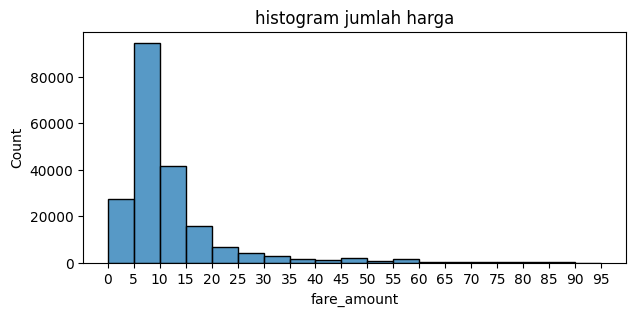

In [15]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['fare_amount'],bins=range(0,100,5))
ax.set_xticks(range(0,100,5))
ax.set_xticklabels(range(0,100,5))
plt.title('histogram jumlah harga');

Jumlah tarifnya miring ke kanan. dan visualisasi menunjukkan bahwa sebagian besar perjalanan memiliki tarif 5-20 dolar.

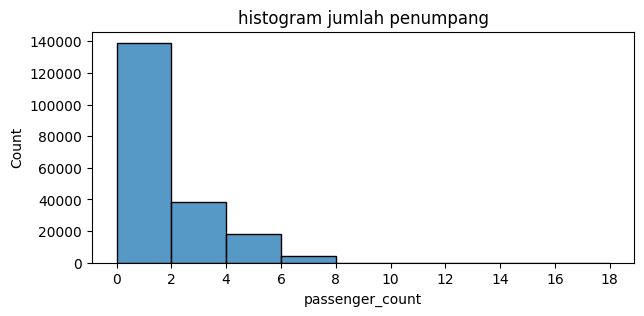

In [16]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['passenger_count'],bins=range(0,20,2))
ax.set_xticks(range(0,20,2))
ax.set_xticklabels(range(0,20,2))
plt.title('histogram jumlah penumpang');

Jadi 2 penumpang per perjalanan adalah mayoritas dan jumlah penumpang mencapai 8.

### Mean fare amount by passenger count

Periksa jumlah tarif dengan jumlah penumpang.

In [17]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: count, dtype: int64

In [18]:
mean_fares_by_passenger_count = df.groupby(['passenger_count']).mean()[['fare_amount']]
mean_fares_by_passenger_count

,fare_amount
passenger_count,
0,9.439266
1,11.254158
2,11.784452
3,11.486731
4,11.642472
5,11.199698
6,12.158537
208,11.700000


/tmp/ipykernel_79655/2126696279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
/tmp/ipykernel_79655/2126696279.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


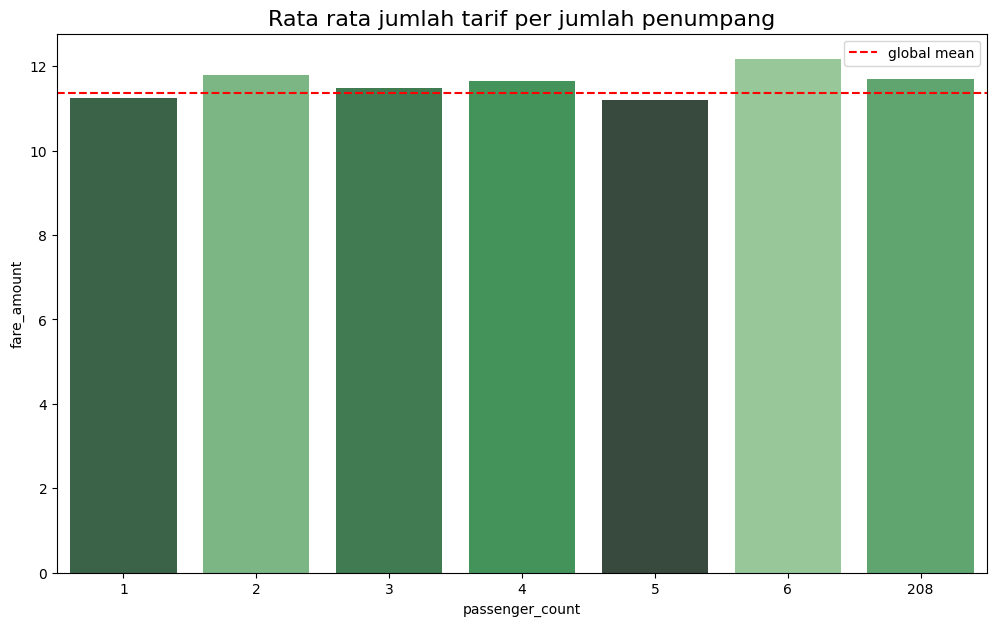

In [19]:
data = mean_fares_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['fare_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['fare_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['fare_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Rata rata jumlah tarif per jumlah penumpang', fontsize=16);

## Feature Engineering: Creating month and day columns by datatime

Buat kolom bulan dan hari untuk memahami data lebih detail.


In [20]:
# Membuat kolom bulan
df['month'] = df['pickup_datetime'].dt.month_name()
# Membuat kolom hari
df['day'] = df['pickup_datetime'].dt.day_name()

### Monthly rides

Menganalisis perjalanan berdasarkan bulan.

menyusun ulang bulannya.

In [21]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = df['month'].value_counts().reindex(index=month_order)
monthly_rides

month
January      17668
February     16695
March        18763
April        18606
May          18859
June         17787
July         15094
August       14221
September    15266
October      16212
November     15312
December     15516
Name: count, dtype: int64

/tmp/ipykernel_79655/1128079627.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


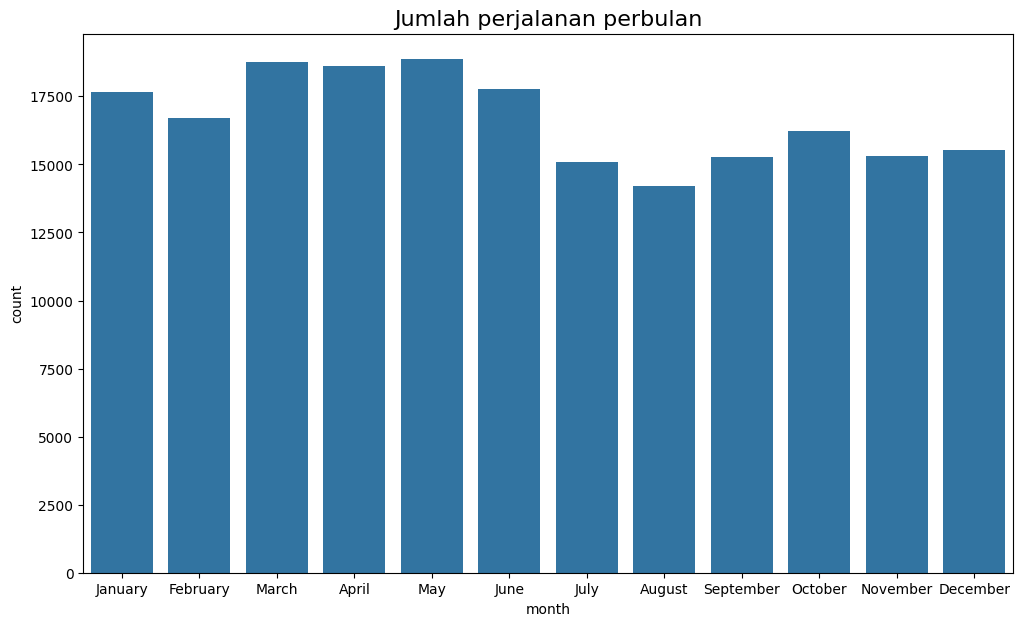

In [22]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Jumlah perjalanan perbulan', fontsize=16);

Perjalanan bulanannya konsisten tetapi pada bulan-bulan musim panas seperti di bulan Juli, Agustus, dan September ada beberapa penurunan.





### Rides per day

In [23]:
daily_rides = df['day'].value_counts()

In [24]:
day_order = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_rides.reindex(index=day_order)

day
Monday       25243
Tuesday      28126
Wednesday    29037
Thursday     30021
Friday       30880
Saturday     30251
Sunday       26441
Name: count, dtype: int64

/tmp/ipykernel_79655/1021813327.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


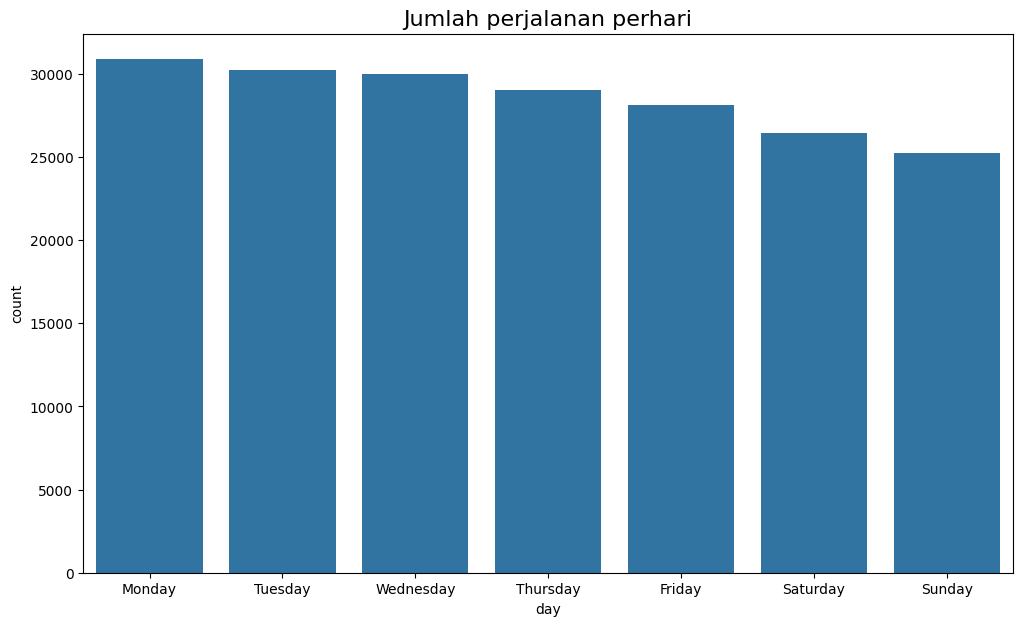

In [25]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
plt.title('Jumlah perjalanan perhari', fontsize=16);

Jadi, hari Senin memiliki banyak perjalanan yang jelas karena merupakan awal minggu, sedangkan hari Sabtu dan Minggu mengalami penurunan karena hari libur.

### Revenue per day

In [26]:
df_without_date = df.drop(columns=['pickup_datetime'])

In [27]:
total_amount_per_day = df_without_date.groupby(by='day').sum()[['fare_amount']]
total_amount_per_day = total_amount_per_day.reindex(index=day_order)

/tmp/ipykernel_79655/4135955008.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'Pendapatan perhari')

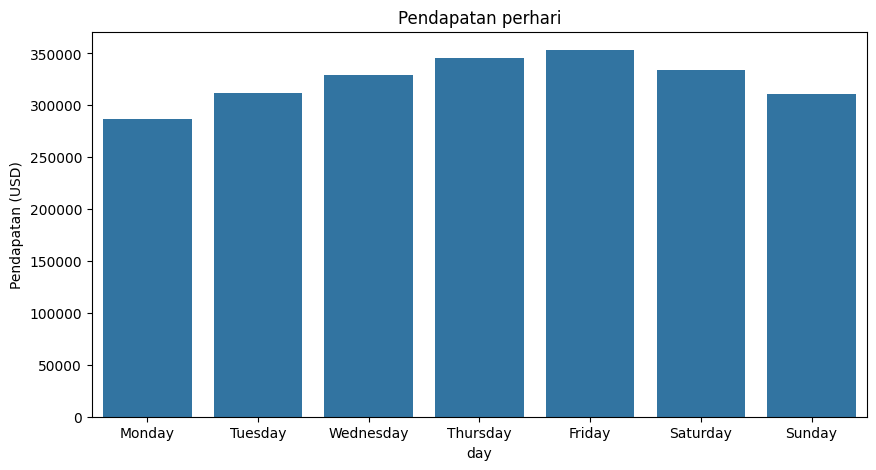

In [28]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=total_amount_per_day.index,y=total_amount_per_day['fare_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel("Pendapatan (USD)")
plt.title("Pendapatan perhari")

Pendapatan tinggi pada hari Kamis dan Jumat, sementara hari lainnya memiliki pendapatan yang lebih rendah. Selain itu, jumlah perjalanan tinggi pada hari Senin, yang cukup menarik.

### Revenue per month

In [29]:
total_amount_per_month = df_without_date.groupby(by='month').sum()[['fare_amount']]
total_amount_per_month = total_amount_per_month.reindex(index=month_order)

/tmp/ipykernel_79655/760518800.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


Text(0.5, 1.0, 'Pendapatan perbulan')

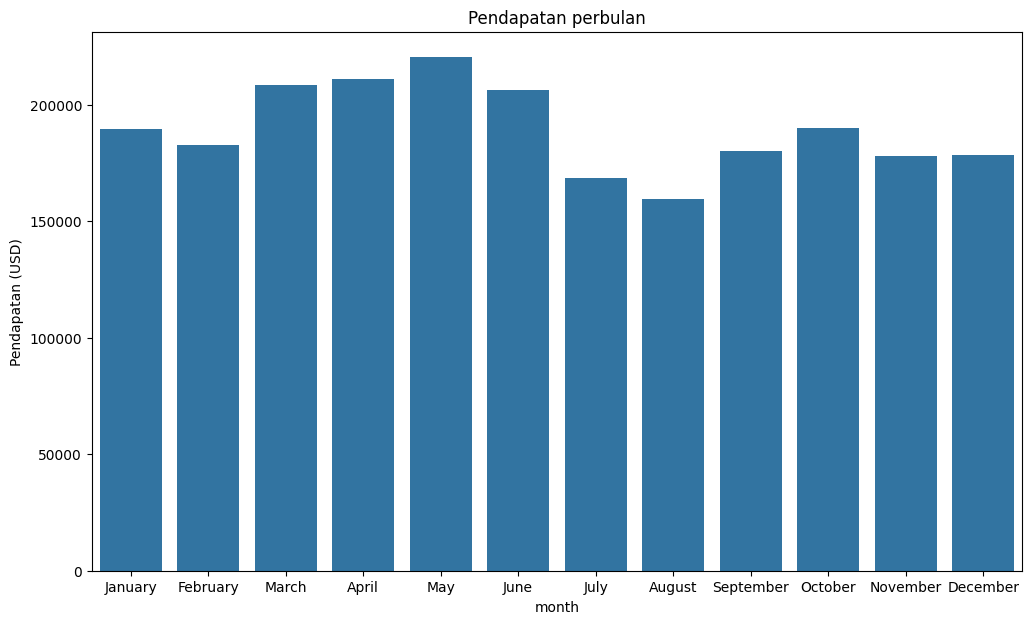

In [30]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_per_month.index,y=total_amount_per_month['fare_amount'])
ax.set_xticklabels(month_order)
ax.set_ylabel("Pendapatan (USD)")
plt.title("Pendapatan perbulan")

Pendapatan per bulan menunjukkan bahwa bulan-bulan musim panas, yaitu Juli, Agustus, dan September, memiliki pendapatan yang lebih rendah dibandingkan bulan-bulan lainnya, sebagaimana ditunjukkan oleh jumlah perjalanan per bulan.

## hypothesis test for fare amount relationship with passenger count

Seperti yang telah kita lihat sebelumnya, rata-rata tarif dengan jumlah penumpang menunjukkan nilai rata-rata yang sama untuk semua. Jadi, mari kita uji apakah ada hubungan di antara keduanya atau tidak.

In [31]:
from scipy import stats

In [32]:
df.describe()[['fare_amount','passenger_count']]

,fare_amount,passenger_count
count,199999.000000,199999.000000
mean,11.359892,1.684543
std,9.901760,1.385995
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


In [33]:
df.groupby('passenger_count')[['fare_amount']].mean()

,fare_amount
passenger_count,
0,9.439266
1,11.254158
2,11.784452
3,11.486731
4,11.642472
5,11.199698
6,12.158537
208,11.700000


Seperti yang kita lihat, nilai jumlah penumpang dan tarif konsisten dan tidak menunjukkan adanya hubungan, tetapi hal ini bisa jadi karena pengambilan sampel secara acak. Untuk menentukan apakah nilai-nilai ini signifikan secara statistik, mari kita lakukan uji hipotesis.

**Hypothesis** <br>


**Null Hypothesis:** Tidak ada perbedaan antara rata-rata tarif berdasarkan jumlah penumpang. <br>
**Alternative Hypothesis:** Terdapat perbedaan antara rata-rata tarif berdasarkan jumlah penumpang.

In [34]:
one_passenger = df[df['passenger_count'] == 1]['fare_amount']
two_passenger = df[df['passenger_count'] == 2]['fare_amount']
three_passenger = df[df['passenger_count'] == 3]['fare_amount']
four_passenger = df[df['passenger_count'] == 4]['fare_amount']
five_passenger = df[df['passenger_count'] == 5]['fare_amount']
six_passenger = df[df['passenger_count'] == 6]['fare_amount']

In [35]:
result = stats.f_oneway(one_passenger,two_passenger,three_passenger,four_passenger,five_passenger,six_passenger)
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

F-statistic: 21.20953546719199
p-value: 2.838724710616687e-21


Karena p-value lebih kecil dari tingkat signifikansi 0,05, maka kami menolak  null hypothesis dan menyimpulkan bahwa terdapat perbedaan signifikan dalam rata-rata tarif berdasarkan jumlah penumpang.

## Linear regression model

Setelah menghapus nilai yang hilang, selanjutnya analisis duplikat.

In [36]:
df1 = df.copy()

In [37]:
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,May,Thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,July,Friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,August,Monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,June,Friday
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,August,Thursday


In [38]:
df1.duplicated().sum()

0

Jadi, kami tidak memiliki duplikat atau nilai yang hilang. Sekarang, kami akan mencari dan menghapus outlier dari data karena model pembelajaran mesin terpengaruh oleh outlier tersebut.

In [39]:
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')

In [40]:
df1['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

Sekarang fitur utama kami adalah jumlah tarif, jarak, dan jumlah penumpang, jadi mari kita lihat outlier di fitur-fitur tersebut.

### Removing Outline for LR model

Jadi, "fare_amount" dan 'distance' juga memiliki nilai negatif.

In [41]:
sum(df1['distance_km']==0)

5632

5 ribu perjalanan memiliki jarak 0.

In [42]:
df1['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

Nilai minimum adalah -52, jadi kita bisa mengubahnya menjadi 0, tetapi nilai maksimum adalah 499, yang tidak realistis.

In [43]:
def outlier_imputer(df, column_list, iqr_factor):
    df_copy = df.copy()  # Work on a copy of the dataframe (Bekerja pada salinan dataframe)

    for col in column_list:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        lower_threshold = q1 - (iqr_factor * iqr)

        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        print('q1:', q1)
        print('lower_threshold:', lower_threshold)

        # Filter out outliers
        df_copy = df_copy[(df_copy[col] <= upper_threshold) & (df_copy[col] >= lower_threshold)]
        print(df_copy[col].describe())
        print()

    return df_copy

In [44]:
df1 = outlier_imputer(df1, ['fare_amount','distance_km','passenger_count'], 1.5)

fare_amount
q3: 12.5
upper_threshold: 22.25
q1: 6.0
lower_threshold: -3.75
count    182833.000000
mean          8.940095
std           4.143264
min          -3.500000
25%           5.700000
50%           8.000000
75%          11.000000
max          22.200000
Name: fare_amount, dtype: float64

distance_km
q3: 3.2827774817668756
upper_threshold: 6.4631959656428295
q1: 1.1624984925162398
lower_threshold: -2.0179199913597143
count    174540.000000
mean          2.218767
std           1.454764
min           0.000000
25%           1.131295
50%           1.876565
75%           3.030305
max           6.463182
Name: distance_km, dtype: float64

passenger_count
q3: 2.0
upper_threshold: 3.5
q1: 1.0
lower_threshold: -0.5
count    154869.000000
mean          1.259942
std           0.548312
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: passenger_count, dtype: float64



In [45]:
df1.shape

(154869, 11)

Sekarang kita memiliki kolom tanggal, bulan, dan hari.

Mari kita ubah menjadi huruf kecil dan temukan jam sibuk dalam data.

In [46]:
df1.columns

Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'month', 'day'],
      dtype='object')

In [47]:
df1['day'] = df1['day'].str.lower()
df1['month'] = df1['pickup_datetime'].dt.strftime('%b').str.lower()

In [48]:
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday


### Feature Engineering: Creating Rush hour column

In [49]:
df1['rush_hour'] = df1['pickup_datetime'].dt.hour

In [50]:
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday,19
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday,20
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday,21
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday,8
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday,2


In [51]:
df1.loc[df1['day'].isin(['sunday']), 'rush_hour'] = 1

In [52]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [53]:
df1.loc[(df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1).astype('int32')

df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday,1
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday,0
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday,1
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday,0


In [54]:
df1.columns

Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'month', 'day', 'rush_hour'],
      dtype='object')

In [55]:
df2 = df1.drop(['Id', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','day', 'month'],axis=1)
df2.head()

,fare_amount,passenger_count,distance_km,rush_hour
0,7.5,1,1.683323,1
1,7.7,1,2.457590,0
2,12.9,1,5.036377,0
3,5.3,3,1.661683,1
5,4.9,1,0.000000,0


In [56]:
df2['rush_hour'] = df2['rush_hour'].astype(float)

In [57]:
df2.shape

(154869, 4)

### Removing the rows with 0 distance

In [58]:
df2 = df2[df2['distance_km']!=0].reindex()

In [59]:
df2.shape

(150334, 4)

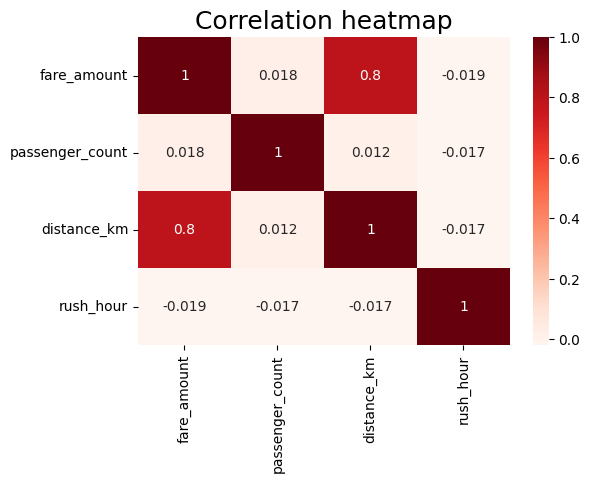

In [60]:

plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

### sklearn Imports

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

### Split between train and test sets

In [62]:
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### Scaling Data

In [64]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.47525458  0.04439963 -0.92799532]
 [-0.47525458 -0.27870613  1.07759165]
 [-0.47525458  0.20015523 -0.92799532]
 ...
 [-0.47525458  2.0666192   1.07759165]
 [ 1.34715627  0.36458155 -0.92799532]
 [-0.47525458 -0.9281082   1.07759165]]


### Fitting LR model

In [65]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [66]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.6343486664757545
R^2: 0.6343486664757545
MAE: 1.6094934340513007
MSE: 5.038622623320374
RMSE: 2.2446876449342286


In [67]:
X_test_scaled = scaler.transform(X_test)

In [68]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.6155362567578377
R^2: 0.6155362567578377
MAE: 1.63667201854413
MSE: 5.311641794341511
RMSE: 2.3046999358574882


### Evaluating wether LR is good for this data or not?

In [69]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
43530,5.7,6.574404,-0.874404
25500,8.5,8.106230,0.393770
144453,5.0,5.684405,-0.684405
14117,4.5,5.971026,-1.471026
155218,4.9,5.718351,-0.818351


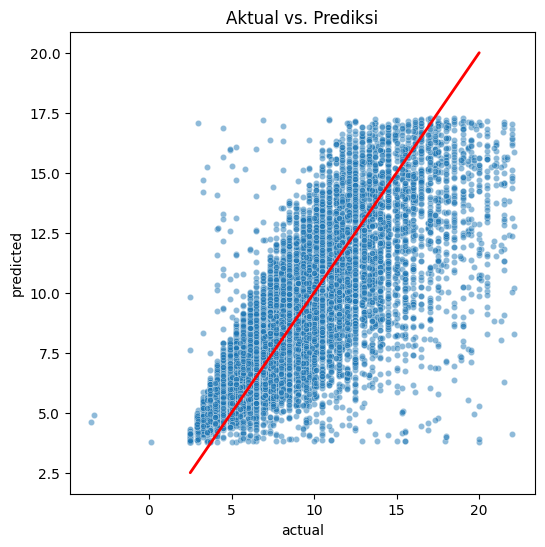

In [70]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([2.5,20], [2.5,20], c='red', linewidth=2)
plt.title('Aktual vs. Prediksi');

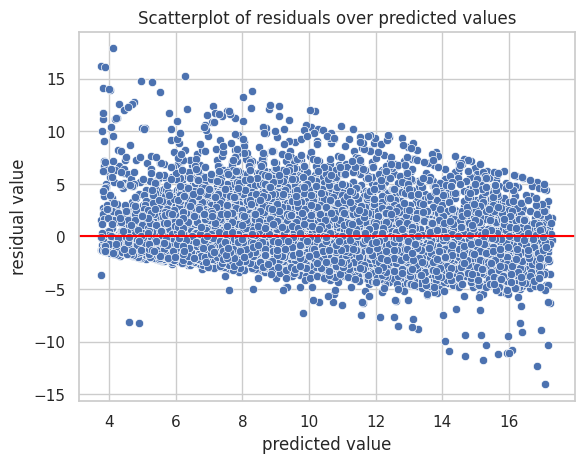

In [71]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [72]:
print(X_train['distance_km'].std())

# 2. Membagia koefisien model dengan standard deviation
print(2.959849 / X_train['distance_km'].std())

1.4223114110654356
2.081013325895216


### Finding from the LR model

Jadi, menurut data, untuk setiap 1,42 km perjalanan, tarif meningkat rata-rata sebesar 2,95 dolar, atau untuk setiap 1 km perjalanan, tarif meningkat rata-rata sebesar 2,08 dolar.

## Training Model for prediction purpose

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from xgboost import plot_importance

In [74]:
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday,1
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday,0
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday,1
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday,0


### Feature Engineering

In [75]:
# membuat kolom 'am_rush'
df1['am_rush'] = df1['pickup_datetime'].dt.hour

# membuat kolom 'daytime'
df1['daytime'] = df1['pickup_datetime'].dt.hour

# membuat kolom 'pm_rush'
df1['pm_rush'] = df1['pickup_datetime'].dt.hour

# membuat kolom 'nighttime'
df1['nighttime'] = df1['pickup_datetime'].dt.hour

In [76]:
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [77]:
df1['am_rush'] = df1.apply(am_rush, axis=1)

In [78]:
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [79]:
df1['daytime'] = df1.apply(daytime, axis=1)

In [80]:
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [81]:
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

In [82]:
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [83]:
df1['nighttime'] = df1.apply(nighttime, axis=1)

In [84]:
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour,am_rush,daytime,pm_rush,nighttime
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday,1,0,0,1,0
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday,0,0,0,0,1
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday,0,0,0,0,1
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday,1,1,0,0,0
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday,0,0,0,0,1


In [85]:
drop_columns = ['Id','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rush_hour']
df1 = df1.drop(drop_columns,axis=1)
df1.head()

,fare_amount,passenger_count,distance_km,month,day,am_rush,daytime,pm_rush,nighttime
0,7.5,1,1.683323,may,thursday,0,0,1,0
1,7.7,1,2.457590,jul,friday,0,0,0,1
2,12.9,1,5.036377,aug,monday,0,0,0,1
3,5.3,3,1.661683,jun,friday,1,0,0,0
5,4.9,1,0.000000,feb,saturday,0,0,0,1


In [86]:
df1 = pd.get_dummies(df1, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154869 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      154869 non-null  float64
 1   passenger_count  154869 non-null  int64  
 2   distance_km      154869 non-null  float64
 3   am_rush          154869 non-null  int64  
 4   daytime          154869 non-null  int64  
 5   pm_rush          154869 non-null  int64  
 6   nighttime        154869 non-null  int64  
 7   month_aug        154869 non-null  bool   
 8   month_dec        154869 non-null  bool   
 9   month_feb        154869 non-null  bool   
 10  month_jan        154869 non-null  bool   
 11  month_jul        154869 non-null  bool   
 12  month_jun        154869 non-null  bool   
 13  month_mar        154869 non-null  bool   
 14  month_may        154869 non-null  bool   
 15  month_nov        154869 non-null  bool   
 16  month_oct        154869 non-null  bool   
 

In [87]:
X = df1.drop(['fare_amount'],axis=1)
y = df1[['fare_amount']]

In [88]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
X_train.shape

(108408, 23)

In [90]:
y_train.shape

(108408, 1)

## Random Forest Model

In [91]:
# Menerapkan Regresi Random Forest pada dataset
regressor = RandomForestRegressor(random_state=42)

# Sesuaikan regresor dengan data x dan y
regressor.fit(X_train, y_train)

/home/mayuka/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [92]:
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Tentukan serangkaian metrik penilaian untuk menangkap
scoring = {'r2','accuracy'}

# 4. Inisialisasi objek GridSearchCV
rf1 = GridSearchCV(regressor, cv_params, scoring=scoring, cv=4,refit='r2')

In [93]:
# rf1.fit(X_train, y_train.ravel())

In [94]:
# rf1.best_score_

In [95]:
# rf1.best_params_

In [96]:
random_forest = RandomForestRegressor(max_depth= None,
 max_features= 1.0,
 max_samples= 0.7,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators=300)

In [97]:
random_forest.fit(X_train,y_train)

/home/mayuka/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_samples=0.7, n_estimators=300)

In [98]:

# Evaluasi model
from sklearn.metrics import mean_squared_error, r2_score

# Membuat prediksi menggunakan data yang sudah ada atau data baru
predictions = random_forest.predict(X_test)

# Evaluasi data
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 5.681957537177129
R-squared: 0.5868840411511493


### Random Forest Findings

Nilai R-squared adalah 0,58. Sekarang, mari kita coba XGBoost.

## Gradient Boost Model

In [99]:
# 1. Inisialisasi XGBoost
xgb = XGBRegressor(objective ='reg:squarederror',random_state=42, learning_rate = 0.02, max_depth = 8,min_child_weight= 4,
 n_estimators = 200)

# 2. Buatlah dictionary hyperparameter yang akan disetel
cv_params = {'learning_rate': [0.1,0.01,0.02],
             'max_depth': [8,9,11],
             'min_child_weight': [2,3,4],
             'n_estimators': [500,200,300,600]
             }

# 3. Tentukan serangkaian metrik penilaian yang akan digunakan.
scoring = {'accuracy', 'r2'}

# 4. Inisialisasi objek GridSearchCV.
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='r2')

In [100]:
y_train.shape

(108408, 1)

In [101]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [102]:
# Membuat prediksi pada data yang sama atau data baru
predictions = xgb.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 5.102603826157649
R-squared: 0.6290068626403809


### XGB findings

XGB mencakupi 0.62 varian data atau dengan akurasi 62%, dimana hal ini merupakan hasil tertinggi

## Model Exporting

In [103]:
!pip install pickle-mixin


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [104]:
import pickle

# Simpan model yang sudah dilatih ke file menggunakan pickle
with open('data/gradient_boost.pickle', 'wb') as to_write:
    pickle.dump(xgb, to_write)

print("Pickle file 'gradient_boost.pickle' created successfully.")


Pickle file 'gradient_boost.pickle' created successfully.


In [110]:
# Fungsi untuk membaca model dari file pickle
def read_pickle(path, saved_model_name):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

# # Membaca model dari file
model = read_pickle('data/', 'gradient_boost')

print("Model loaded successfully.")



Model loaded successfully.


In [111]:
X_test.head()

,passenger_count,distance_km,am_rush,daytime,pm_rush,nighttime,month_aug,month_dec,month_feb,month_jan,...,month_may,month_nov,month_oct,month_sep,day_monday,day_saturday,day_sunday,day_thursday,day_tuesday,day_wednesday
151695,2,3.204652,0,0,0,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
164471,1,2.371665,0,0,0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
99363,2,0.747529,0,1,0,0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
135597,1,1.615625,1,0,0,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
26267,1,0.531467,0,1,0,0,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [113]:
model.predict(X_test.head())


array([10.011554 ,  8.2308655,  5.1420784,  7.3280916,  4.7318716],
      dtype=float32)

In [112]:
y_test.head(5)

,fare_amount
151695,9.0
164471,7.3
99363,4.1
135597,8.9
26267,4.0
